### Q1. Consider an image with 2 objects and a total of 3-pixel values (1 for each object and one for the background). Add Gaussian noise to the image. Implement and test Otsu’s algorithm with this image.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise
from collections import deque

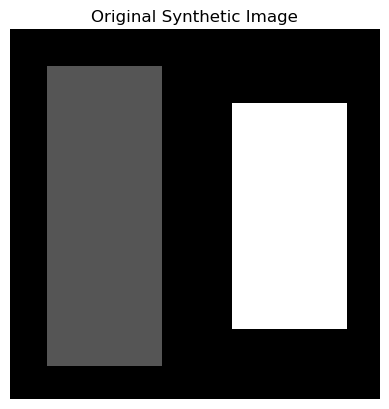

In [ ]:

image = np.zeros((100, 100), dtype=np.uint8)


cv2.rectangle(image, (10, 10), (40, 90), 50, -1)
cv2.rectangle(image, (60, 20), (90, 80), 150, -1)

# Display original image
plt.imshow(image, cmap='gray')
plt.title("Original Synthetic Image")
plt.axis('off')
plt.show()


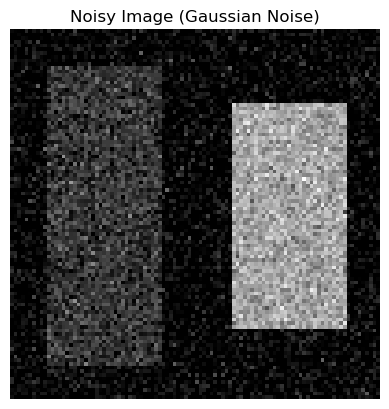

In [11]:
# Add Gaussian noise
noisy_image = random_noise(image, mode='gaussian', var=0.01)
noisy_image = (255 * noisy_image).astype(np.uint8)

# Display noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Gaussian Noise)")
plt.axis('off')
plt.show()


## Step 3: Apply Otsu’s Thresholding

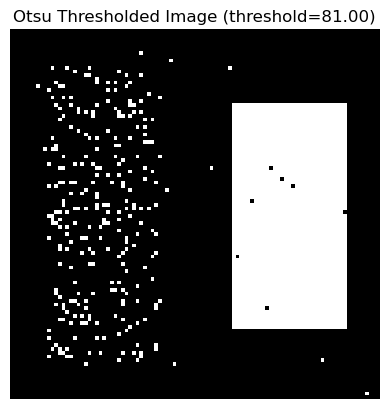

In [12]:
# Otsu's thresholding
_, otsu_thresh = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display thresholded image
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f"Otsu Thresholded Image (threshold={_:0.2f})")
plt.axis('off')
plt.show()


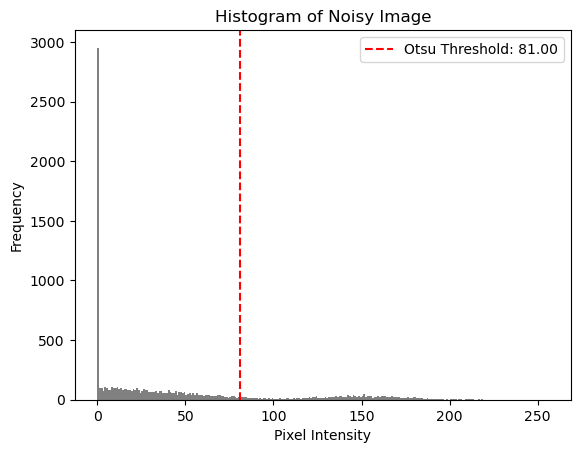

In [13]:
# Plot histogram of noisy image
plt.hist(noisy_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.axvline(_, color='red', linestyle='--', label=f'Otsu Threshold: {_:.2f}')
plt.title("Histogram of Noisy Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### Q2. Implement a region-growing technique for image segmentation. The basic idea is to start from a set of points inside the object of interest (foreground), denoted as seeds, and recursively add neighboring pixels as long as they are in a pre-defined range of the pixel values of the seeds.

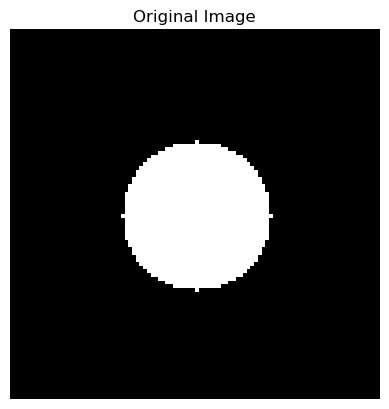

In [17]:
# Create a blank image with a circular object
image = np.zeros((100, 100), dtype=np.uint8)
cv2.circle(image, (50, 50), 20, 100, -1)

plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


In [4]:
def region_growing(image, seed, threshold=5):
    height, width = image.shape
    visited = np.zeros_like(image, dtype=bool)
    region = np.zeros_like(image, dtype=np.uint8)

    seed_val = image[seed]
    queue = deque([seed])
    visited[seed] = True

    while queue:
        x, y = queue.popleft()
        region[x, y] = 255

        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                nx, ny = x + dx, y + dy
                if (0 <= nx < height) and (0 <= ny < width):
                    if not visited[nx, ny]:
                        if abs(int(image[nx, ny]) - int(seed_val)) <= threshold:
                            queue.append((nx, ny))
                            visited[nx, ny] = True
    return region

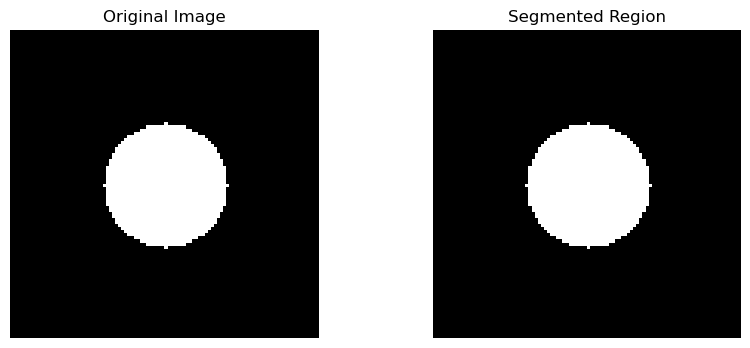

In [5]:
# Define seed point inside the object
seed_point = (50, 50)

# Apply region growing
segmented = region_growing(image, seed_point, threshold=10)

# Show result
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title("Segmented Region")
plt.axis('off')
plt.show()